In [1]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# Importing RFE 
from sklearn.feature_selection import RFE


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing_data = pd.read_csv("train.csv", encoding = 'utf-8')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_data.shape

(1460, 81)

In [4]:
# Check for column details
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# To get the description of the dataset
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Columns having null values
housing_data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [7]:
# Checking for percentage nulls
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
#Checking the shape of the dataframe
housing_data.shape

(1460, 81)

###### Removing/Imputing NAN values in categorical attributes

In [9]:
# check for null values in all categorical columns

housing_data.select_dtypes(include='object').isnull().sum()[housing_data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing_data[col]=housing_data[col].fillna('None')

In [11]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [12]:
housing_data.shape

(1460, 81)

Remove null values from Categorical attributes that have 85% vualues associated to 1 value 

In [13]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housing_data.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

housing_data.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000


In [14]:
#dimension of df after removal 
housing_data.shape

(1460, 60)

In [15]:
# once again check for null values in all categorical columns

housing_data.select_dtypes(include='object').isnull().sum()[housing_data.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

no null values in categorical variables

Now we will remove null values from Numerical attributes

In [16]:
# check the null values in the numerical data

housing_data.select_dtypes(include=['int64','float']).isnull().sum()[housing_data.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [17]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

housing_data['LotFrontage'] = housing_data['LotFrontage'].replace(np.nan, housing_data['LotFrontage'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].replace(np.nan, housing_data['MasVnrArea'].median())

In [18]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].fillna(0)
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].astype(int)

In [19]:
housing_data.shape

(1460, 60)

In [20]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000


In [21]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_data['IsRemodelled'] = housing_data.apply(checkForRemodel, axis=1)
housing_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0


In [22]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing_data['BuiltOrRemodelAge'] = housing_data.apply(getBuiltOrRemodelAge, axis=1)


In [23]:
housing_data.shape

(1460, 62)

In [24]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing_data['OldOrNewGarage'] = housing_data['GarageYrBlt'].apply(getGarageConstructionPeriod)
housing_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0,8,1


In [25]:
housing_data.shape

(1460, 63)

In [26]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

housing_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [27]:
housing_data.shape

(1460, 59)

Remove numerical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [28]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housing_data.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housing_data.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_data.drop(['MoSold'], axis = 1, inplace = True)

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,None,Normal,250000,0,8,1


In [29]:
housing_data.shape

(1460, 49)

In [30]:
# check for percentage of null values in each column

percent_missing = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


No Null values in dataset

Check for Duplicate values

In [31]:
# Check if there are any duplicate values in the dataset

housing_data[housing_data.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


No dulpicates found

Outliers check and removal 

In [32]:
#Checking for outlier in the numerical columns
housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


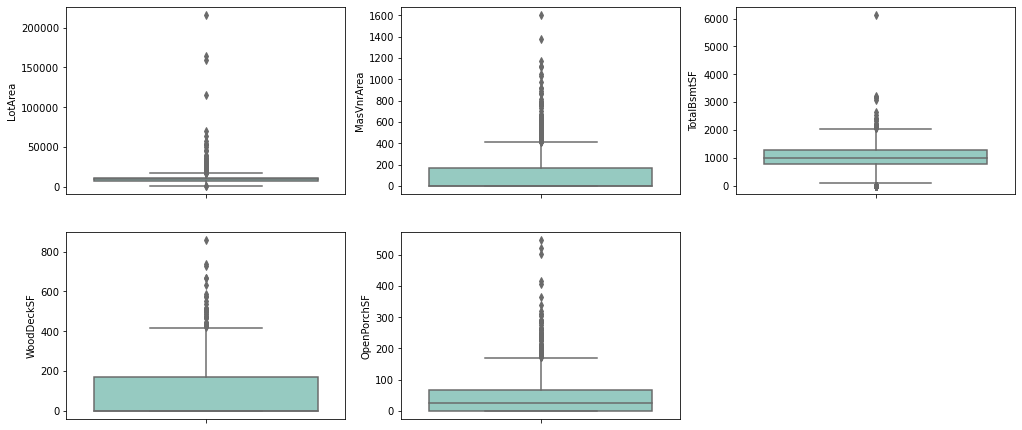

In [33]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing_data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing_data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing_data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing_data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing_data)
plt.show()

In [34]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housing_data['LotArea'].quantile(0.98)
housing_data = housing_data[housing_data["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housing_data['MasVnrArea'].quantile(0.98)
housing_data = housing_data[housing_data["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing_data['TotalBsmtSF'].quantile(0.99)
housing_data = housing_data[housing_data["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housing_data['WoodDeckSF'].quantile(0.99)
housing_data = housing_data[housing_data["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housing_data['OpenPorchSF'].quantile(0.99)
housing_data = housing_data[housing_data["OpenPorchSF"] < nn_quartile_OpenPorchSF]

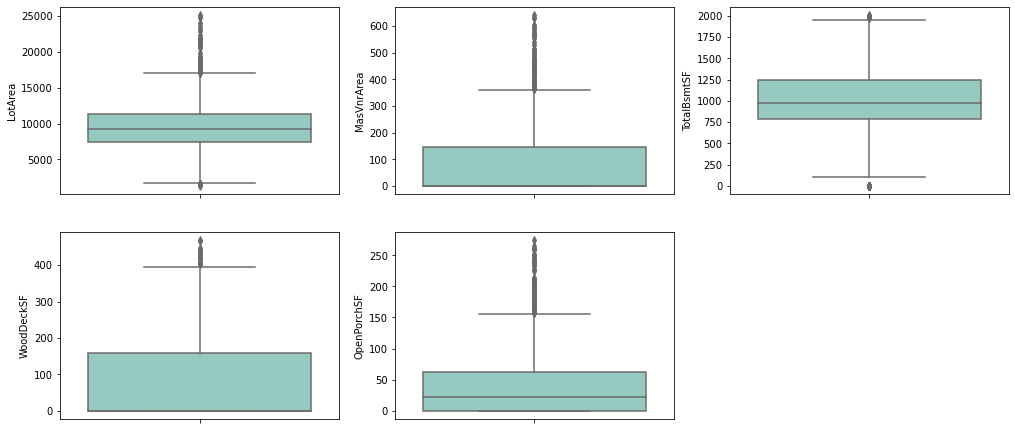

In [35]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing_data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing_data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing_data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing_data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing_data)
plt.show()

In [36]:
# Determine the percentage of data retained

num_data = round(100*(len(housing_data)/1460),2)
print(num_data)

93.01


###### Data Visualization

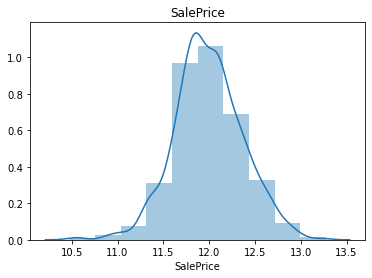

In [37]:
# Visualise the target variable -> SalePrice after transforming the sales price

housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_data['SalePrice'], bins=10)
plt.show()

Sales price or target is aproximately normalized with some noise present

<Figure size 720x360 with 0 Axes>

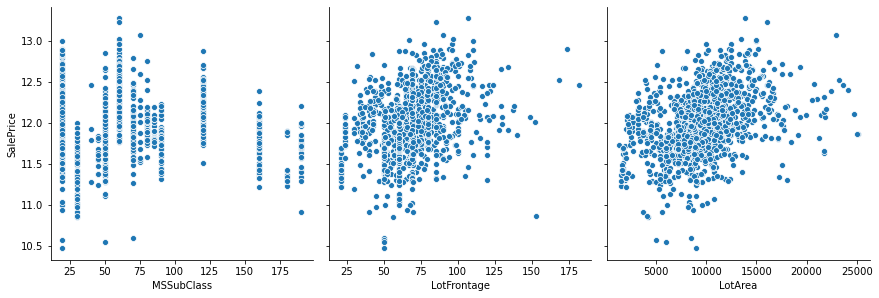

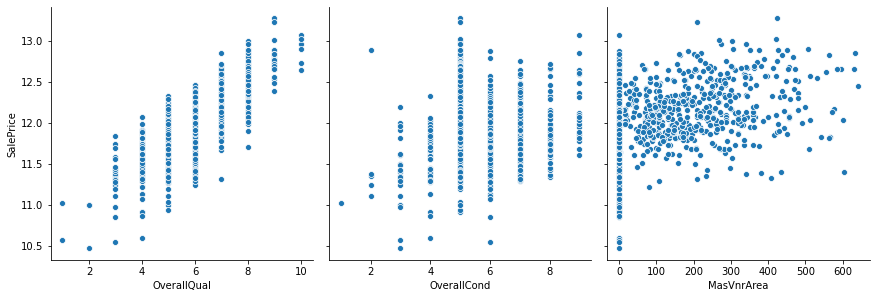

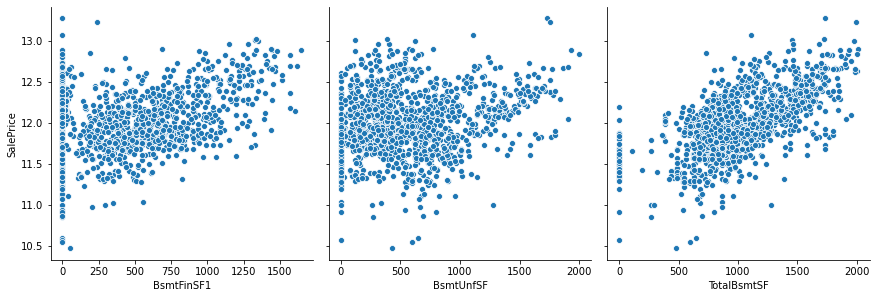

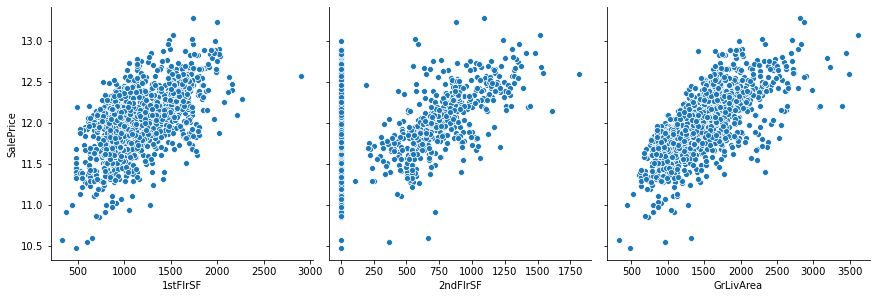

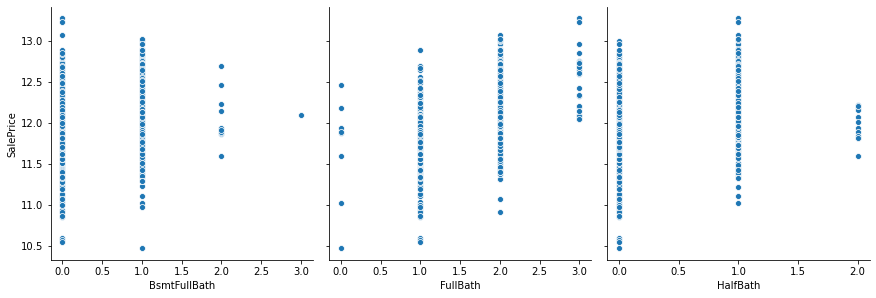

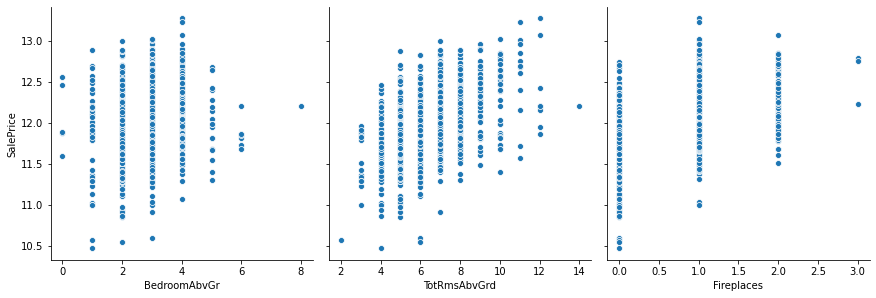

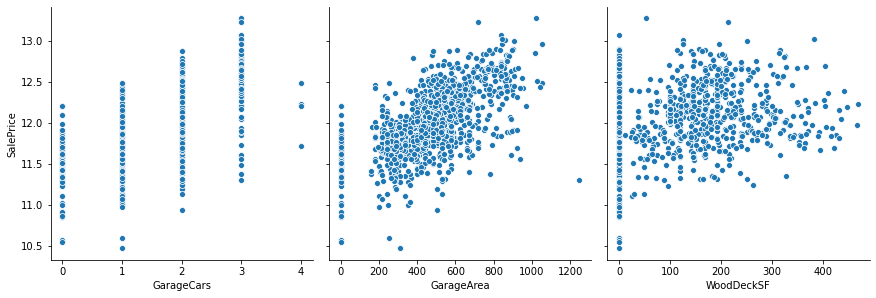

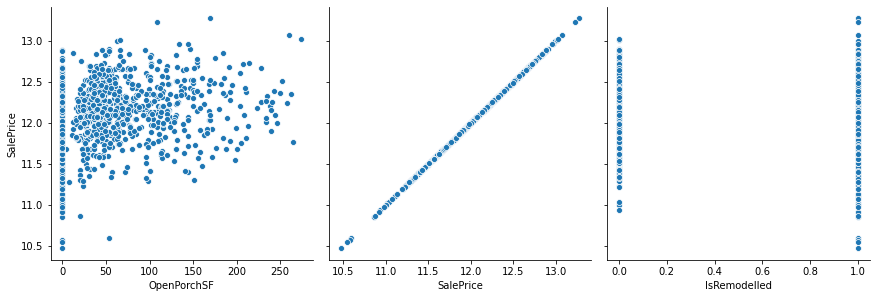

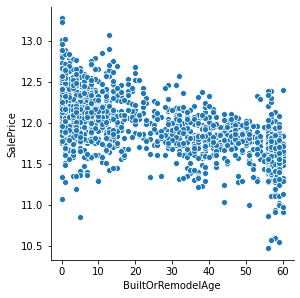

In [38]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

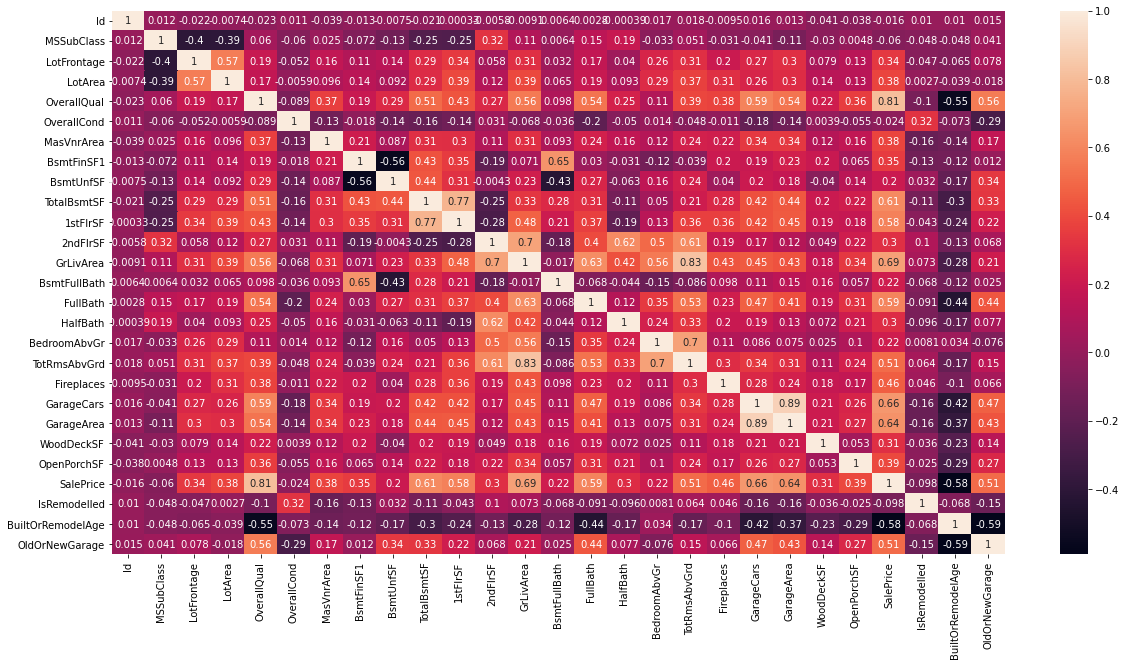

In [39]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housing_data.corr(), annot = True)
plt.show()

Inference:
1.TotRmsAbvGrd and GrLivArea showing high 83% correlation
2.Garage Area and Garage Cars show 89%

Wewill drop these variables 

In [40]:
# Removing the highly correlated variables
housing_data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [41]:
housing_data.shape

(1358, 47)

###### Data Preparation
Converting categorical to Numerical
creating dummy variables 

In [42]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

housing_data['d_LotShape'] = housing_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_data['d_ExterQual'] = housing_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_data['d_BsmtQual'] = housing_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_BsmtExposure'] = housing_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_data['d_BsmtFinType1'] = housing_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing_data['d_HeatingQC'] = housing_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_KitchenQual'] = housing_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_FireplaceQu'] = housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_GarageFinish'] = housing_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_data['d_BldgType'] = housing_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing_data['d_HouseStyle'] = housing_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_data['d_Fence'] = housing_data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing_data['d_LotConfig'] = housing_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing_data['d_MasVnrType'] = housing_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_data['d_SaleCondition'] = housing_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,Normal,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,Normal,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,Normal,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,Abnorml,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,Normal,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [43]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

housing_data = housing_data.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [44]:
housing_data.shape

(1358, 46)

In [45]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housing_data['MSZoning'], prefix='MSZoning', drop_first = True)
housing_data = pd.concat([housing_data, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housing_data['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_data = pd.concat([housing_data, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housing_data['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_data = pd.concat([housing_data, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housing_data['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_data = pd.concat([housing_data, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_data = pd.concat([housing_data, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing_data['Foundation'], prefix='Foundation', drop_first = True)
housing_data = pd.concat([housing_data, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing_data['GarageType'], prefix='GarageType', drop_first = True)
housing_data = pd.concat([housing_data, d_GarageType], axis = 1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [46]:
# drop the below columns as we now have new columns derived from these columns

housing_data = housing_data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [47]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


All columns are now numeric

###### Train test Split


In [48]:
#Putting all feature variable to X

X = housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [49]:
# Putting response variable  to y

y = housing_data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [50]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [51]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

###### RFE
We will use RFE to get the best 50 features out of the 129 features and use the new
features for further analysis

In [52]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [53]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [54]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [55]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

###### Model Evalution


###### 1.Ridge

In [56]:
# list pf alphas for tuning

params = {'alpha': [0.0001, 0.001, 0.01,0.05 ,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
#printing best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 5.0}


In [58]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
17,5,-0.078534,-0.084748,1
18,6,-0.078613,-0.084754,2
19,7,-0.078682,-0.084772,3
16,4,-0.078449,-0.084775,4
20,8,-0.078744,-0.084791,5
21,9,-0.078804,-0.084814,6
15,3,-0.078366,-0.084828,7
22,10,-0.078861,-0.084843,8
14,2,-0.078286,-0.084894,9
13,1,-0.078208,-0.084986,10


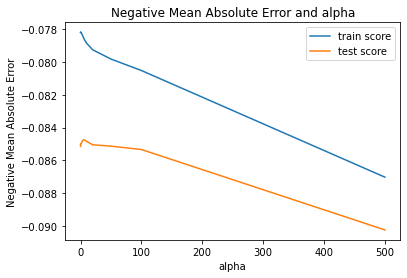

In [59]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [60]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [61]:
# check the coefficient values with lambda = 5

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01975195,  0.07352588,  0.04358789,  0.03156858,  0.03896337,
        0.01064728, -0.00021244,  0.09860795,  0.01298539,  0.01662253,
        0.01845819,  0.02628478,  0.00906492, -0.0136291 , -0.02054222,
        0.01566476,  0.02269114,  0.01086417,  0.01893893,  0.01946167,
        0.0168273 ,  0.01482215, -0.02481284,  0.01751659,  0.07510643,
        0.03160535,  0.12241892,  0.09584418,  0.02052634, -0.01068279,
       -0.00784397, -0.01322934, -0.01154209, -0.00526407, -0.0079229 ,
        0.01939706, -0.02202673,  0.01430916, -0.00931488,  0.00942798,
       -0.0204404 , -0.02841269,  0.02541606,  0.02571555,  0.01715729,
        0.03094609,  0.01813834,  0.02190524,  0.01405494,  0.01918746])

In [62]:
from sklearn.metrics import mean_squared_error,r2_score

# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.011000494608608283

In [63]:
#let's check for some more metrics 

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)


metric2=[]
r2_train_ridge=r2_score(y_train,y_pred_train_ridge)
print("r2_train_ridge:",r2_train_ridge)
metric2.append(r2_train_ridge)


r2_test_ridge=r2_score(y_test,y_pred_test_ridge)
print("r2_test_ridge:",r2_test_ridge)
metric2.append(r2_test_ridge)

rss_lr_train_ridge=np.sum(np.square(y_train - y_pred_train_ridge))
print("rss_lr_train_ridge:",rss_lr_train_ridge)
metric2.append(rss_lr_train_ridge)

rss_lr_test_ridge=np.sum(np.square(y_test - y_pred_test_ridge))
print("rss_lr_test_ridge:",rss_lr_test_ridge)
metric2.append(rss_lr_test_ridge)


mse_train_lr_ridge=mean_squared_error(y_train, y_pred_train_ridge)
print("mse_train_lr_ridge:",mse_train_lr_ridge)

mse_test_lr_ridge=mean_squared_error(y_test, y_pred_test_ridge)
print("mse_test_lr_ridge: ",mse_test_lr_ridge)


r2_train_ridge: 0.916325834596925
r2_test_ridge: 0.9138335990775496
rss_lr_train_ridge: 11.574320128590168
rss_lr_test_ridge: 4.488201800312179
mse_train_lr_ridge: 0.012183494872200176
mse_test_lr_ridge:  0.011000494608608283


Here we can notice difference between test and train results are less

In [64]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0198
1,OverallQual,0.0735
2,OverallCond,0.0436
3,BsmtFinSF1,0.0316
4,TotalBsmtSF,0.0390
5,1stFlrSF,0.0106
6,2ndFlrSF,-0.0002
7,GrLivArea,0.0986
8,BsmtFullBath,0.0130
9,FullBath,0.0166


In [65]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0198,
 'OverallQual': 0.0735,
 'OverallCond': 0.0436,
 'BsmtFinSF1': 0.0316,
 'TotalBsmtSF': 0.039,
 '1stFlrSF': 0.0106,
 '2ndFlrSF': -0.0002,
 'GrLivArea': 0.0986,
 'BsmtFullBath': 0.013,
 'FullBath': 0.0166,
 'HalfBath': 0.0185,
 'GarageCars': 0.0263,
 'WoodDeckSF': 0.0091,
 'IsRemodelled': -0.0136,
 'BuiltOrRemodelAge': -0.0205,
 'OldOrNewGarage': 0.0157,
 'd_BsmtQual': 0.0227,
 'd_BsmtExposure': 0.0109,
 'd_HeatingQC': 0.0189,
 'd_KitchenQual': 0.0195,
 'd_FireplaceQu': 0.0168,
 'd_GarageFinish': 0.0148,
 'd_BldgType': -0.0248,
 'd_SaleCondition': 0.0175,
 'MSZoning_FV': 0.0751,
 'MSZoning_RH': 0.0316,
 'MSZoning_RL': 0.1224,
 'MSZoning_RM': 0.0958,
 'Neighborhood_Crawfor': 0.0205,
 'Neighborhood_Edwards': -0.0107,
 'Neighborhood_Gilbert': -0.0078,
 'Neighborhood_IDOTRR': -0.0132,
 'Neighborhood_MeadowV': -0.0115,
 'Neighborhood_NAmes': -0.0053,
 'Neighborhood_NWAmes': -0.0079,
 'Neighborhood_NridgHt': 0.0194,
 'Neighborhood_OldTown': -0.022,
 'Neighborhood_StoneBr': 

In [66]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [67]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(12)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.1224
4,GrLivArea,True,1,0.0986
13,MSZoning_RM,True,1,0.0958
10,MSZoning_FV,True,1,0.0751
0,OverallQual,True,1,0.0735
1,OverallCond,True,1,0.0436
3,TotalBsmtSF,True,1,0.0390
2,BsmtFinSF1,True,1,0.0316
11,MSZoning_RH,True,1,0.0316
5,GarageCars,True,1,0.0263


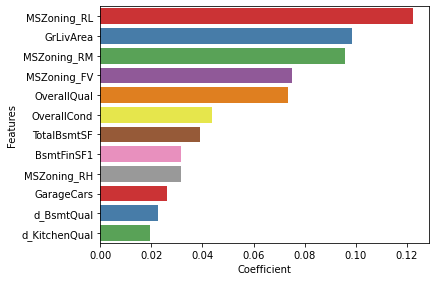

In [68]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

Inference:
The above plot shows how in Ridge regression top 12 features with their corresponding coefficient values are significant for predicting target variavle i.e.sales

###### 2.Lasso

In [69]:
lasso = Lasso()

# list of alphas



#params = {'alpha': [0.0001, 0.001, 0.01,0.05 ,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
#                    8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]} #A diiferent set of lambda values for better performance

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.078259,-0.084971,1
2,0.0003,-0.078368,-0.085032,2
0,0.0001,-0.078176,-0.085045,3
3,0.0004,-0.078485,-0.085106,4
4,0.0005,-0.078607,-0.085139,5
5,0.001,-0.079278,-0.085550,6
6,0.002,-0.080626,-0.086331,7
7,0.003,-0.081412,-0.086648,8
8,0.004,-0.082004,-0.087061,9
9,0.005,-0.082698,-0.087776,10


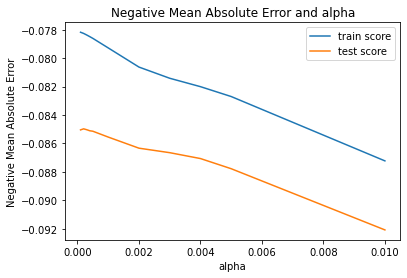

In [71]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [73]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.01909556,  0.07363721,  0.04275121,  0.031931  ,  0.03868209,
       -0.        , -0.01227055,  0.11435595,  0.01255018,  0.01468805,
        0.01687763,  0.02726282,  0.00895402, -0.01360897, -0.02101408,
        0.0156425 ,  0.02278192,  0.01109297,  0.01905055,  0.01900027,
        0.0166182 ,  0.01510547, -0.02404048,  0.01709023,  0.09042237,
        0.03907619,  0.15298833,  0.12042161,  0.02044052, -0.01050085,
       -0.00740526, -0.0106368 , -0.01108642, -0.00498989, -0.00740538,
        0.01920056, -0.0209264 ,  0.01402513, -0.00931658,  0.00965212,
       -0.01706122, -0.0280589 ,  0.02205074,  0.02497109,  0.01619039,
        0.02978516,  0.01766952,  0.02100637,  0.01336983,  0.01827886])

In [74]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.011195981595568857

In [75]:
#let's check for some more metrics for lasso

y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)


metric3=[]
r2_train_lasso=r2_score(y_train,y_pred_train_lasso)
print("r2_train_lasso:",r2_train_lasso)
metric3.append(r2_train_lasso)


r2_test_lasso=r2_score(y_test,y_pred_test_lasso)
print("r2_test_lasso:",r2_test_lasso)
metric3.append(r2_test_lasso)

rss_lr_train_lasso=np.sum(np.square(y_train - y_pred_train_lasso))
print("rss_lr_train_lasso:",rss_lr_train_lasso)
metric3.append(rss_lr_train_lasso)

rss_lr_test_lasso=np.sum(np.square(y_test - y_pred_test_lasso))
print("rss_lr_test_lasso:",rss_lr_test_lasso)
metric3.append(rss_lr_test_lasso)


mse_train_lr_lasso=mean_squared_error(y_train, y_pred_train_lasso)
print("mse_train_lr_lasso:",mse_train_lr_lasso)

mse_test_lr_lasso=mean_squared_error(y_test, y_pred_test_lasso)
print("mse_test_lr_lasso: ",mse_test_lr_lasso)

r2_train_lasso: 0.9167457542585093
r2_test_lasso: 0.9123023579204124
rss_lr_train_lasso: 11.516234283717326
rss_lr_test_lasso: 4.5679604909920934
mse_train_lr_lasso: 0.012122351877597186
mse_test_lr_lasso:  0.011195981595568857


In [76]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0191
1,OverallQual,0.0736
2,OverallCond,0.0428
3,BsmtFinSF1,0.0319
4,TotalBsmtSF,0.0387
5,2ndFlrSF,-0.0123
6,GrLivArea,0.1144
7,BsmtFullBath,0.0126
8,FullBath,0.0147
9,HalfBath,0.0169


In [77]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.019095558831452225,
 'OverallQual': 0.07363721369761925,
 'OverallCond': 0.042751205744947354,
 'BsmtFinSF1': 0.03193100364060811,
 'TotalBsmtSF': 0.038682086783565495,
 '1stFlrSF': -0.0,
 '2ndFlrSF': -0.012270548892457744,
 'GrLivArea': 0.11435594863473703,
 'BsmtFullBath': 0.012550175639661154,
 'FullBath': 0.014688053534117411,
 'HalfBath': 0.016877632983368234,
 'GarageCars': 0.02726281881263289,
 'WoodDeckSF': 0.00895401530452653,
 'IsRemodelled': -0.013608971279846498,
 'BuiltOrRemodelAge': -0.02101408280844388,
 'OldOrNewGarage': 0.015642499927812227,
 'd_BsmtQual': 0.022781919051799746,
 'd_BsmtExposure': 0.011092966765753108,
 'd_HeatingQC': 0.01905055303002325,
 'd_KitchenQual': 0.019000272720593826,
 'd_FireplaceQu': 0.016618197614747886,
 'd_GarageFinish': 0.015105468433482167,
 'd_BldgType': -0.024040481459436804,
 'd_SaleCondition': 0.017090226151846796,
 'MSZoning_FV': 0.0904223708959056,
 'MSZoning_RH': 0.03907618675125498,
 'MSZoning_RL': 0.15298832821644

In [78]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [79]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(12)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.152988
11,MSZoning_RM,True,1,0.120422
4,GrLivArea,True,1,0.114356
8,MSZoning_FV,True,1,0.090422
0,OverallQual,True,1,0.073637
1,OverallCond,True,1,0.042751
9,MSZoning_RH,True,1,0.039076
3,TotalBsmtSF,True,1,0.038682
2,BsmtFinSF1,True,1,0.031931
14,Foundation_PConc,True,1,0.029785


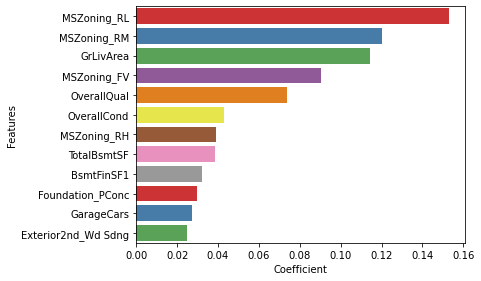

In [80]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

Inference:
The above plot shows how in Lasso regression top 12 features with their corresponding coefficient values are significant for predicting target variavle i.e.sales

###### Conclusion
We found Optimum lambda value for
Ridge is 5
Lasso is 0.0001

Ridge:
MSE(test) 0.011000494608608283
r2_train_ridge: 0.916325834596925
r2_test_ridge: 0.9138335990775496
rss_lr_train_ridge: 11.574320128590168
rss_lr_test_ridge: 4.488201800312179
mse_train_lr_ridge: 0.012183494872200176
mse_test_lr_ridge:  0.011000494608608283

Lasso:
MSE(test) 0.011195981595568857
r2_train_lasso: 0.9167457542585093
r2_test_lasso: 0.9123023579204124
rss_lr_train_lasso: 11.516234283717326
rss_lr_test_lasso: 4.5679604909920934
mse_train_lr_lasso: 0.012122351877597186
mse_test_lr_lasso:  0.011195981595568857

Mean square error in case of Lasso  is slightly higher than Ridge.
And R square values(test) is higher in case of Ridge than Lasso.

Lasso helps in feature reduction as the coefficient value of one of the feature became 0.
So based on Lasso features that can affect selecting the Sales price are Zoning classifications, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area.Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.